In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/denoising-dirty-documents/sampleSubmission.csv
/kaggle/input/denoising-dirty-documents/test/55.png
/kaggle/input/denoising-dirty-documents/test/64.png
/kaggle/input/denoising-dirty-documents/test/106.png
/kaggle/input/denoising-dirty-documents/test/19.png
/kaggle/input/denoising-dirty-documents/test/127.png
/kaggle/input/denoising-dirty-documents/test/133.png
/kaggle/input/denoising-dirty-documents/test/13.png
/kaggle/input/denoising-dirty-documents/test/49.png
/kaggle/input/denoising-dirty-documents/test/121.png
/kaggle/input/denoising-dirty-documents/test/112.png
/kaggle/input/denoising-dirty-documents/test/16.png
/kaggle/input/denoising-dirty-documents/test/58.png
/kaggle/input/denoising-dirty-documents/test/115.png
/kaggle/input/denoising-dirty-documents/test/148.png
/kaggle/input/denoising-dirty-documents/test/28.png
/kaggle/input/denoising-dirty-documents/test/154.png
/kaggle/input/denoising-dirty-documents/test/88.png
/kaggle/input/denoising-dirty-documents/test/25

In [12]:
import os
import glob
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

In [13]:
training_images = glob.glob('/kaggle/input/denoising-dirty-documents/train/*.png')
cleaned_images = glob.glob('/kaggle/input/denoising-dirty-documents/train_cleaned/*.png')
test_images = glob.glob('/kaggle/input/denoising-dirty-documents/test/*.png')

In [14]:
def load_image(path):
    image_list = np.zeros((len(path), 258, 540, 1))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='grayscale', target_size=(258, 540))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

x_train = load_image(training_images)
y_train = load_image(cleaned_images)
x_test = load_image(test_images)

print(x_train.shape, x_test.shape)


(144, 258, 540, 1) (72, 258, 540, 1)


In [15]:
def train_val_split(x_train, y_train):
    rnd = np.random.RandomState(seed=42)
    perm = rnd.permutation(len(x_train))
    train_idx = perm[:int(0.8 * len(x_train))]
    val_idx = perm[int(0.8 * len(x_train)):]
    return x_train[train_idx], y_train[train_idx], x_train[val_idx], y_train[val_idx]

x_train, y_train, x_val, y_val = train_val_split(x_train, y_train)
print(x_train.shape, x_val.shape)

(115, 258, 540, 1) (29, 258, 540, 1)


In [16]:
img_rows = 258
img_cols = 540
channels = 1
img_shape = (img_rows, img_cols, channels)

Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==============================] - 3s 25ms/step - loss: 0.1936 - val_loss: 0.1312
Epoch 2/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1101 - val_loss: 0.0740
Epoch 3/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0715 - val_loss: 0.0700
Epoch 4/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0726 - val_loss: 0.0741
Epoch 5/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0754 - val_loss: 0.0745
Epoch 6/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0747 - val_loss: 0.0715
Epoch 7/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0701 - val_loss: 0.0642
Epoch 8/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0642 - val_loss: 0.0636
Epoch 9/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0622 - val_loss: 0.0576
Epoch 10/200
115/115 [=======================

Epoch 81/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0061 - val_loss: 0.0065
Epoch 82/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0060 - val_loss: 0.0064
Epoch 83/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 84/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 85/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 86/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 87/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 88/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 89/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 90/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0055

115/115 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 161/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 162/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 163/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 164/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 165/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 166/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 167/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 168/200
115/115 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 169/200
115/115 [==============================] - 1s 9ms/step - loss: 0.0035 - v

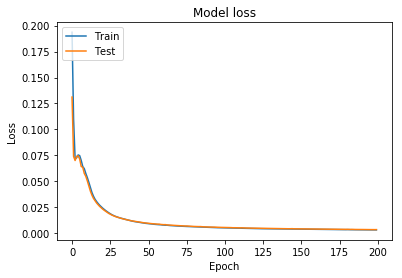

In [17]:
input_layer = Input(shape=img_shape)
        
# encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)

# decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
        
early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=20,
                                       verbose=1, 
                                       mode='auto')

autoencoder_model =Model(input_layer, output_layer)
autoencoder_model.compile(loss='mse', optimizer=Adam(lr=0.001))
history = autoencoder_model.fit(x_train, y_train,
                                             batch_size=32,
                                             epochs=200,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping])
autoencoder_model.summary()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

preds = autoencoder_model.predict(x_test)

In [18]:
preds = autoencoder_model.predict(x_test)
print(preds)

[[[[0.93746096]
   [0.9952395 ]
   [0.9916173 ]
   ...
   [0.99192095]
   [0.99160135]
   [0.9699211 ]]

  [[0.99500644]
   [0.99994266]
   [0.99972546]
   ...
   [0.9996909 ]
   [0.9997005 ]
   [0.99518657]]

  [[0.98757684]
   [0.9992728 ]
   [0.9922917 ]
   ...
   [0.99338543]
   [0.9960523 ]
   [0.9802079 ]]

  ...

  [[0.9838741 ]
   [0.99936825]
   [0.99379516]
   ...
   [0.99172527]
   [0.99597895]
   [0.96160626]]

  [[0.98510253]
   [0.99946916]
   [0.99705374]
   ...
   [0.9950863 ]
   [0.99594706]
   [0.94629025]]

  [[0.93243784]
   [0.98891544]
   [0.9680258 ]
   ...
   [0.9609898 ]
   [0.9573947 ]
   [0.8714065 ]]]


 [[[0.9462975 ]
   [0.9966191 ]
   [0.9946083 ]
   ...
   [0.9932349 ]
   [0.99218595]
   [0.9706135 ]]

  [[0.9961082 ]
   [0.99996936]
   [0.99988395]
   ...
   [0.99970984]
   [0.99969625]
   [0.99537665]]

  [[0.9894792 ]
   [0.99954045]
   [0.9962338 ]
   ...
   [0.99229664]
   [0.9957218 ]
   [0.9829482 ]]

  ...

  [[0.99077547]
   [0.99982846]
   [0.9

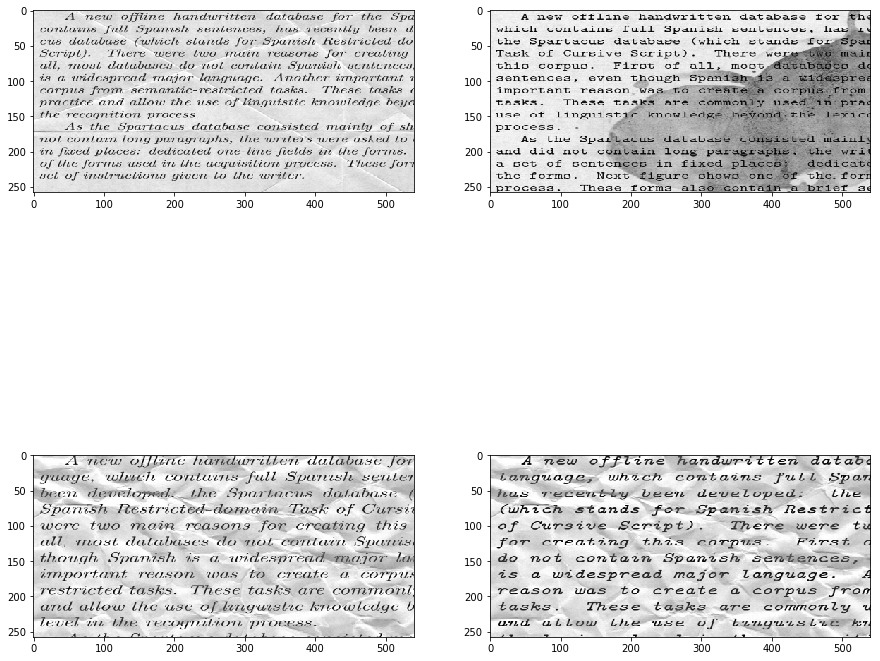

In [19]:
x_test_0 = x_test[13] * 255.0
x_test_0 = x_test_0.reshape(258, 540)
x_test_1 = x_test[55] * 255.0
x_test_1 = x_test_1.reshape(258, 540)
x_test_2 = x_test[34] * 255.0
x_test_2 = x_test_2.reshape(258, 540)
x_test_3 = x_test[40] * 255.0
x_test_3 = x_test_3.reshape(258, 540)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(x_test_0,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(x_test_1,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(x_test_2,cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(x_test_3,cmap='gray')

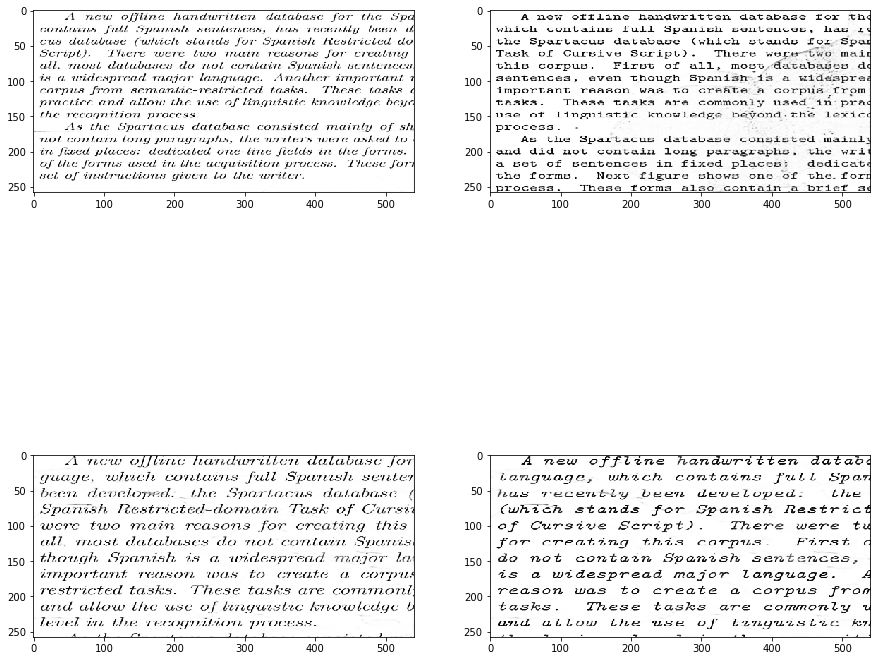

In [20]:
preds_0 = preds[13] * 255.0
preds_0 = preds_0.reshape(258, 540)
preds_1 = preds[55] * 255.0
preds_1 = preds_1.reshape(258, 540)
preds_2 = preds[34] * 255.0
preds_2 = preds_2.reshape(258, 540)
preds_3 = preds[40] * 255.0
preds_3 = preds_3.reshape(258, 540)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(preds_0,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(preds_1,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(preds_2,cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(preds_3,cmap='gray')